Training of neural networks with different parameters to visualise the effect of each with the aim of teaching the network the dynamics of free fall bodies.

In [ ]:
# @title FREE FALL BODY
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [ ]:
# @title Generazione della lista h_values
np.random.seed(42)
num_samples = 10000
h_values = np.random.uniform(0, 100, num_samples)
print(h_values)

[37.45401188 95.07143064 73.19939418 ... 94.6707915  39.74879924
 21.7140404 ]


In [ ]:
# @title Generazione della lista v_values
g = 9.8
v_values = np.sqrt(2 * g * h_values)
print(v_values)

[27.09425461 43.16711758 37.87754118 ... 43.0760666  27.91194126
 20.6299586 ]


In [ ]:
# @title Generazione del dataframe fall_df
fall_df = pd.DataFrame(data = h_values, columns = ['altezza'])
fall_df['velocità']  = v_values
print(fall_df)

        altezza   velocità
0     37.454012  27.094255
1     95.071431  43.167118
2     73.199394  37.877541
3     59.865848  34.254498
4     15.601864  17.487039
...         ...        ...
9995  85.765599  41.000070
9996  89.750884  41.941833
9997  94.670792  43.076067
9998  39.748799  27.911941
9999  21.714040  20.629959

[10000 rows x 2 columns]


In [ ]:
# @title Definizione del modello
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

In [ ]:
# @title Definizione delle liste di training e di test
h_values_tr = h_values[0:8000]
h_values_te =  h_values[8000:10001]
v_values_tr = v_values[0:8000]
v_values_te = v_values[8000:10001]

Epoch 1/200
100/100 [==============================] - 1s 2ms/step - loss: 855.2298
Epoch 2/200
100/100 [==============================] - 0s 2ms/step - loss: 619.5496
Epoch 3/200
100/100 [==============================] - 0s 2ms/step - loss: 461.6079
Epoch 4/200
100/100 [==============================] - 0s 2ms/step - loss: 348.1812
Epoch 5/200
100/100 [==============================] - 0s 2ms/step - loss: 266.5736
Epoch 6/200
100/100 [==============================] - 0s 2ms/step - loss: 207.6632
Epoch 7/200
100/100 [==============================] - 0s 2ms/step - loss: 155.6978
Epoch 8/200
100/100 [==============================] - 0s 2ms/step - loss: 115.1495
Epoch 9/200
100/100 [==============================] - 0s 2ms/step - loss: 86.1604
Epoch 10/200
100/100 [==============================] - 0s 2ms/step - loss: 64.7188
Epoch 11/200
100/100 [==============================] - 0s 2ms/step - loss: 48.8955
Epoch 12/200
100/100 [==============================] - 0s 4ms/step - loss: 3

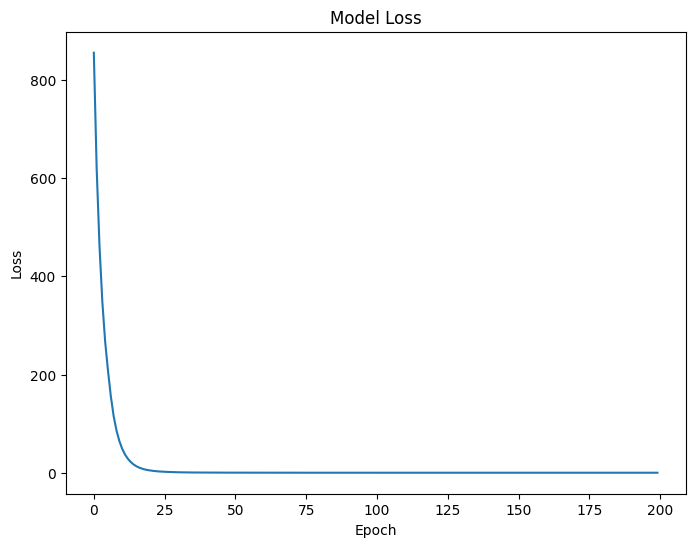

In [ ]:
# @title optimizer=adam ; learning rate=0.01 ; epochs=200 ; batch size=80 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=200, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# @title Test del modello

predicted_velocity = model.predict(h_values_te)
theoretical_velocity = np.sqrt(2 * g * h_values_te)

fall_df_test = pd.DataFrame(data = h_values_te, columns = ['altezza'])
fall_df_test['velocità predetta'] = predicted_velocity
fall_df_test['velocità teorica'] = theoretical_velocity
print('Confronto tra i valori di velocità predetti e teorici \n', fall_df_test)


63/63 [==============================] - 0s 2ms/step
Confronto tra i valori di velocità predetti e teorici 
         altezza  velocità predetta  velocità teorica
0     72.026792          37.638325         37.572931
1     68.728300          36.744560         36.702516
2      9.575420          13.719437         13.699570
3     92.257240          42.577644         42.523428
4     56.847220          33.357140         33.379717
...         ...                ...               ...
1995  85.765599          40.960064         41.000070
1996  89.750884          41.947098         41.941833
1997  94.670792          43.155441         43.076067
1998  39.748799          27.896616         27.911941
1999  21.714040          20.625011         20.629959

[2000 rows x 3 columns]


In [ ]:
# @title Esempio con una altezza h=30.0
new_height = np.array([[30.0]])
print(f"\n\n Theoretical velocity for h={new_height[0, 0]}: {theoretical_velocity[0, 0]} m/s")
print(f"Predicted velocity for h={new_height[0, 0]}: {predicted_velocity[0, 0]} m/s")



 Theoretical velocity for h=30.0: 37.57293082708475 m/s
Predicted velocity for h=30.0: 37.63832473754883 m/s


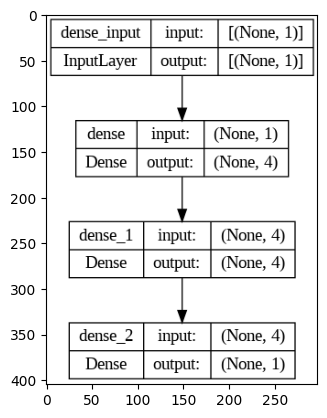

In [ ]:
# @title Visualizzazione della rete neurale
# Visualize the neural network
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plt.imshow(plt.imread('model_plot.png'))
plt.show()

Epoch 1/100
134/134 [==============================] - 1s 3ms/step - loss: 773.0785
Epoch 2/100
134/134 [==============================] - 0s 3ms/step - loss: 495.0769
Epoch 3/100
134/134 [==============================] - 0s 2ms/step - loss: 284.8417
Epoch 4/100
134/134 [==============================] - 0s 2ms/step - loss: 159.1977
Epoch 5/100
134/134 [==============================] - 0s 2ms/step - loss: 92.7896
Epoch 6/100
134/134 [==============================] - 0s 2ms/step - loss: 55.4336
Epoch 7/100
134/134 [==============================] - 0s 2ms/step - loss: 33.9695
Epoch 8/100
134/134 [==============================] - 0s 2ms/step - loss: 21.2805
Epoch 9/100
134/134 [==============================] - 0s 2ms/step - loss: 13.6863
Epoch 10/100
134/134 [==============================] - 0s 2ms/step - loss: 9.0663
Epoch 11/100
134/134 [==============================] - 0s 2ms/step - loss: 6.1576
Epoch 12/100
134/134 [==============================] - 0s 2ms/step - loss: 4.2997


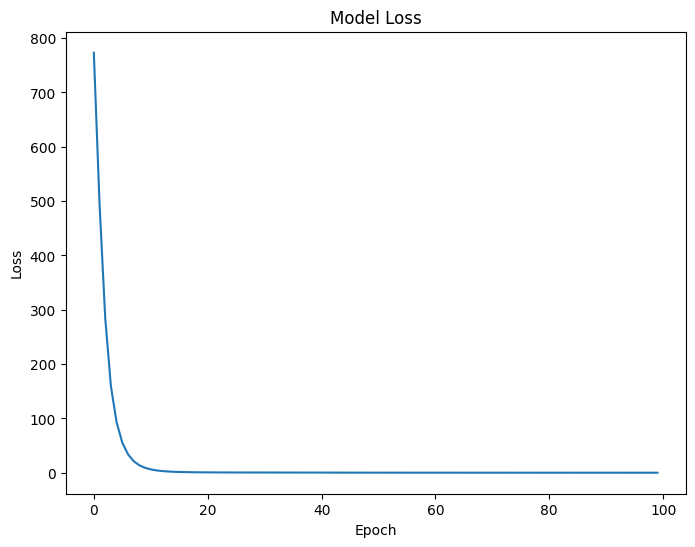

250/250 [==============================] - 0s 1ms/step
Confronto tra i valori di velocità predetti e teorici 
         altezza  velocità predetta  velocità teorica
0     37.454012          27.035078         27.094255
1     95.071431          43.096668         43.167118
2     73.199394          37.708523         37.877541
3     59.865848          34.306580         34.254498
4     15.601864          17.507248         17.487039
...         ...                ...               ...
7995  27.315962          23.203924         23.138558
7996  20.951922          20.423374         20.264690
7997  45.532875          29.924698         29.873807
7998  90.843755          42.212181         42.196417
7999  10.448032          14.150159         14.310186

[8000 rows x 3 columns]


In [ ]:
# @title optimizer=adam ; learning rate=0.01 ; epochs=100 ; batch size=60 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid prova con i valori di training come test
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=100, batch_size=60)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

predicted_velocity = model.predict(h_values_tr)
theoretical_velocity = np.sqrt(2 * g * h_values_tr)

fall_df_test = pd.DataFrame(data = h_values_tr, columns = ['altezza'])
fall_df_test['velocità predetta'] = predicted_velocity
fall_df_test['velocità teorica'] = theoretical_velocity
print('Confronto tra i valori di velocità predetti e teorici \n', fall_df_test)


Epoch 1/100
134/134 [==============================] - 1s 2ms/step - loss: 750.6791
Epoch 2/100
134/134 [==============================] - 0s 2ms/step - loss: 426.1080
Epoch 3/100
134/134 [==============================] - 0s 2ms/step - loss: 257.7664
Epoch 4/100
134/134 [==============================] - 0s 2ms/step - loss: 152.8362
Epoch 5/100
134/134 [==============================] - 0s 2ms/step - loss: 90.6854
Epoch 6/100
134/134 [==============================] - 0s 2ms/step - loss: 55.1646
Epoch 7/100
134/134 [==============================] - 0s 2ms/step - loss: 34.1712
Epoch 8/100
134/134 [==============================] - 0s 2ms/step - loss: 21.6318
Epoch 9/100
134/134 [==============================] - 0s 2ms/step - loss: 14.0821
Epoch 10/100
134/134 [==============================] - 0s 2ms/step - loss: 9.3888
Epoch 11/100
134/134 [==============================] - 0s 2ms/step - loss: 6.3850
Epoch 12/100
134/134 [==============================] - 0s 2ms/step - loss: 4.4172


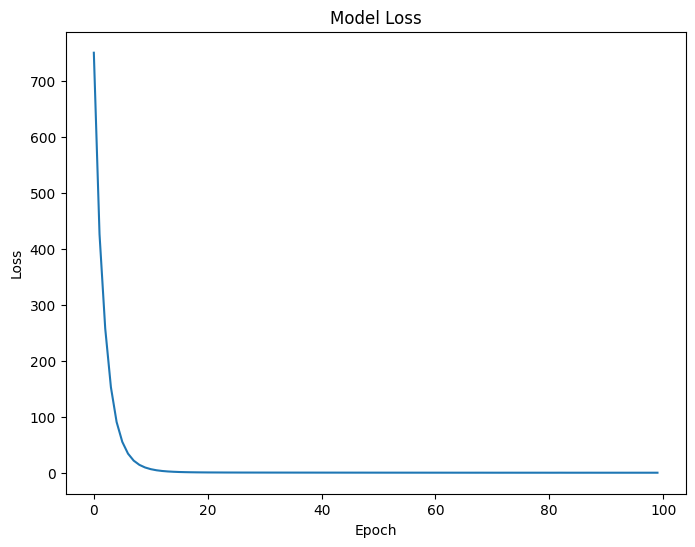

In [ ]:
# @title optimizer=adam ; learning rate=0.01 ; epochs=100 ; batch size=60 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=100, batch_size=60)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 812.8154
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 576.3952
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 428.3944
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 322.7848
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 247.6831
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 195.5668
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 154.1037
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 112.5053
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 82.2980
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 61.1867
Epoch 11/100
100/100 [==============================] - 0s 2ms/step - loss: 45.7673
Epoch 12/100
100/100 [==============================] - 0s 2ms/step - loss: 3

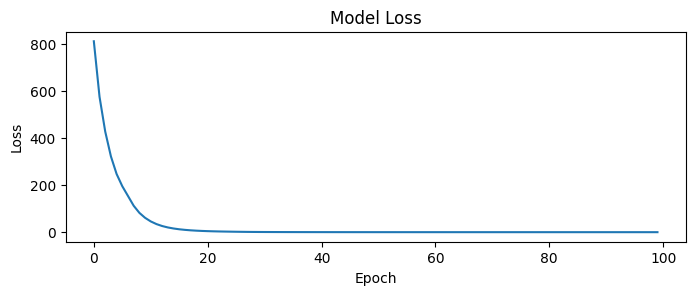

Epoch 1/50
100/100 [==============================] - 1s 2ms/step - loss: 18.2451
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.2315
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 8.5985
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 3.7067
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 6.9744
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 1.1791
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 6.5960
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 1.4437
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3444
Epoch 10/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3145
Epoch 11/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3358
Epoch 12/50
100/100 [==============================] - 0s 3ms/step - loss: 1.7524
Epoch 13/50
100/100 [===

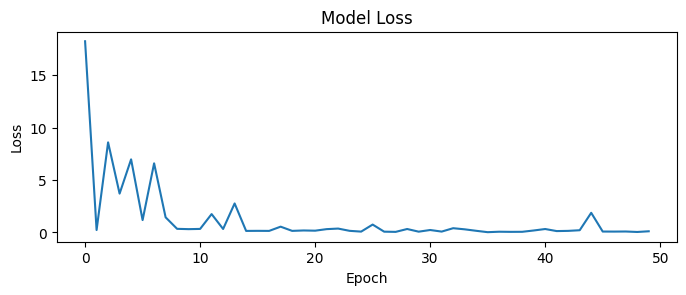

In [ ]:
# @title Due training consecutivi dello stesso modello; optimizer=adam ; learning rate=0.01 ; epochs=100 ;batch size=80 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=100, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))

plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# @title optimizer=adam ; learning rate=0.1 ; epochs=50 ;batch size=80 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=50, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


Epoch 1/80
200/200 [==============================] - 1s 2ms/step - loss: 637.5281
Epoch 2/80
200/200 [==============================] - 0s 2ms/step - loss: 309.9252
Epoch 3/80
200/200 [==============================] - 0s 2ms/step - loss: 149.8104
Epoch 4/80
200/200 [==============================] - 0s 2ms/step - loss: 73.3068
Epoch 5/80
200/200 [==============================] - 0s 2ms/step - loss: 37.1316
Epoch 6/80
200/200 [==============================] - 0s 2ms/step - loss: 19.7422
Epoch 7/80
200/200 [==============================] - 0s 2ms/step - loss: 11.2185
Epoch 8/80
200/200 [==============================] - 0s 2ms/step - loss: 6.7882
Epoch 9/80
200/200 [==============================] - 0s 2ms/step - loss: 4.3734
Epoch 10/80
200/200 [==============================] - 0s 2ms/step - loss: 3.0943
Epoch 11/80
200/200 [==============================] - 0s 2ms/step - loss: 2.2620
Epoch 12/80
200/200 [==============================] - 0s 2ms/step - loss: 1.6848
Epoch 13/80
200

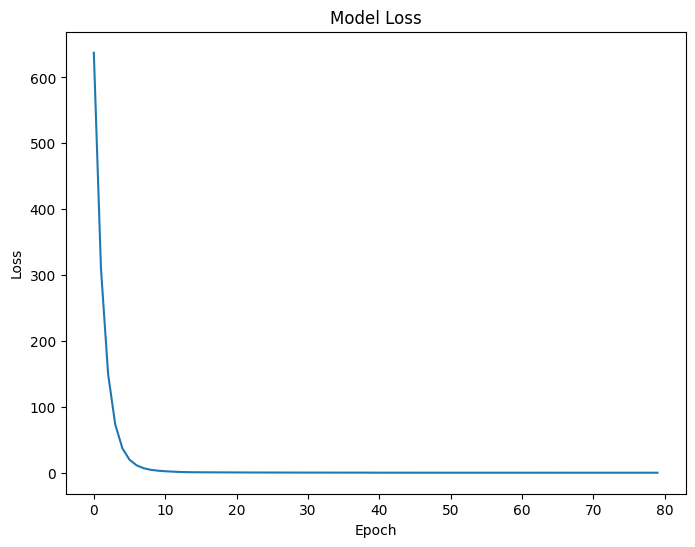

In [ ]:
# @title optimizer=adam ; learning rate=0.01 ; epochs=80 ; batch size=40 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=80, batch_size=40)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/80
200/200 [==============================] - 2s 4ms/step - loss: 687.1625
Epoch 2/80
200/200 [==============================] - 1s 3ms/step - loss: 348.7786
Epoch 3/80
200/200 [==============================] - 1s 3ms/step - loss: 190.4900
Epoch 4/80
200/200 [==============================] - 1s 3ms/step - loss: 104.5412
Epoch 5/80
200/200 [==============================] - 1s 3ms/step - loss: 57.8568
Epoch 6/80
200/200 [==============================] - 0s 2ms/step - loss: 32.5218
Epoch 7/80
200/200 [==============================] - 0s 2ms/step - loss: 18.7337
Epoch 8/80
200/200 [==============================] - 0s 2ms/step - loss: 11.0739
Epoch 9/80
200/200 [==============================] - 0s 2ms/step - loss: 6.7235
Epoch 10/80
200/200 [==============================] - 0s 2ms/step - loss: 4.1965
Epoch 11/80
200/200 [==============================] - 0s 2ms/step - loss: 2.6809
Epoch 12/80
200/200 [==============================] - 0s 2ms/step - loss: 1.7625
Epoch 13/80
2

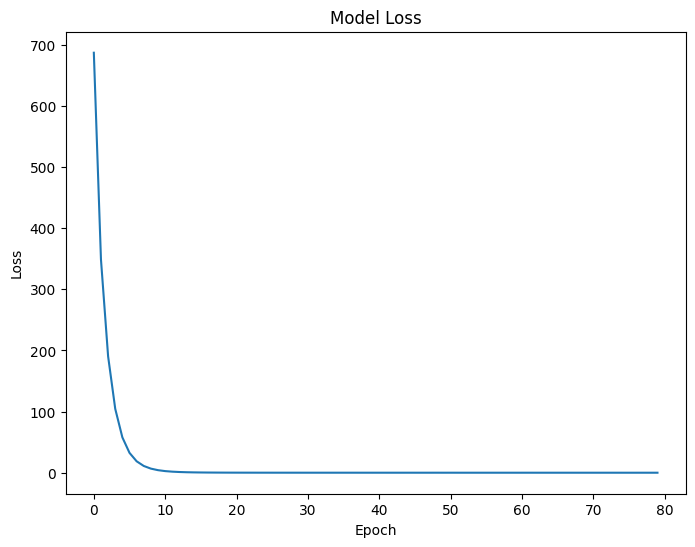

In [ ]:
# @title optimizer=adam ; learning rate=0.01 ; epochs=80 ; batch size=40 ; nodi=4,4 ; layer=1 ; attivazione=sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
        tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=80, batch_size=40)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/70
229/229 [==============================] - 1s 2ms/step - loss: 803.3290
Epoch 2/70
229/229 [==============================] - 0s 2ms/step - loss: 418.1850
Epoch 3/70
229/229 [==============================] - 0s 2ms/step - loss: 219.8941
Epoch 4/70
229/229 [==============================] - 0s 2ms/step - loss: 121.9512
Epoch 5/70
229/229 [==============================] - 0s 2ms/step - loss: 66.3756
Epoch 6/70
229/229 [==============================] - 0s 2ms/step - loss: 37.2665
Epoch 7/70
229/229 [==============================] - 0s 2ms/step - loss: 21.2921
Epoch 8/70
229/229 [==============================] - 0s 2ms/step - loss: 12.8298
Epoch 9/70
229/229 [==============================] - 0s 2ms/step - loss: 8.0917
Epoch 10/70
229/229 [==============================] - 0s 2ms/step - loss: 5.4125
Epoch 11/70
229/229 [==============================] - 0s 2ms/step - loss: 3.7868
Epoch 12/70
229/229 [==============================] - 0s 2ms/step - loss: 2.7874
Epoch 13/70
2

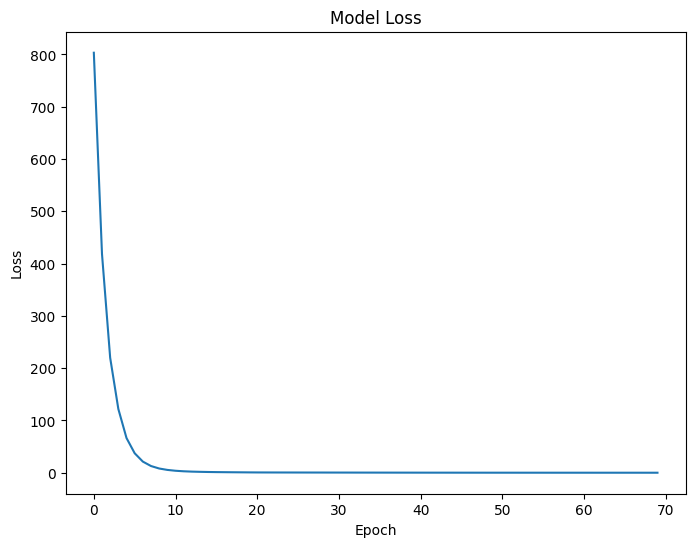

In [ ]:
# @title optimizer=adam ; learning rate=0.007 ; epochs=70 ; batch size=35 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])
opt = tf.keras.optimizers.Adam(learning_rate=0.007)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=70, batch_size=35)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/30
229/229 [==============================] - 1s 2ms/step - loss: 786.0604
Epoch 2/30
229/229 [==============================] - 0s 2ms/step - loss: 551.5906
Epoch 3/30
229/229 [==============================] - 0s 2ms/step - loss: 396.0693
Epoch 4/30
229/229 [==============================] - 0s 2ms/step - loss: 286.8196
Epoch 5/30
229/229 [==============================] - 0s 2ms/step - loss: 204.4423
Epoch 6/30
229/229 [==============================] - 0s 2ms/step - loss: 142.8170
Epoch 7/30
229/229 [==============================] - 0s 2ms/step - loss: 99.6904
Epoch 8/30
229/229 [==============================] - 0s 2ms/step - loss: 69.3104
Epoch 9/30
229/229 [==============================] - 0s 2ms/step - loss: 48.2365
Epoch 10/30
229/229 [==============================] - 0s 2ms/step - loss: 33.6919
Epoch 11/30
229/229 [==============================] - 0s 2ms/step - loss: 23.6634
Epoch 12/30
229/229 [==============================] - 0s 2ms/step - loss: 16.7346
Epoch 1

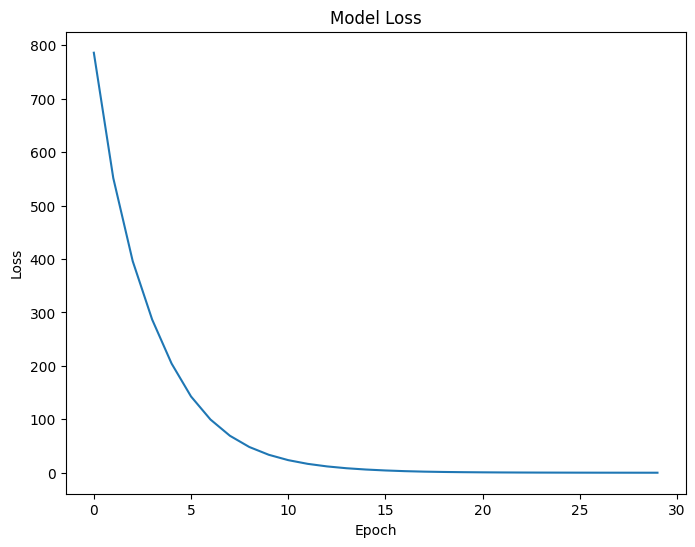

In [ ]:
# @title optimizer=adam ; learning rate=0.007 ; epochs=30 ; batch size=35 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])
opt = tf.keras.optimizers.Adam(learning_rate=0.007)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=30, batch_size=35)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/30
400/400 [==============================] - 2s 3ms/step - loss: 744.2674
Epoch 2/30
400/400 [==============================] - 1s 2ms/step - loss: 250.9351
Epoch 3/30
400/400 [==============================] - 1s 3ms/step - loss: 62.3348
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 22.1769
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 9.9482
Epoch 6/30
400/400 [==============================] - 1s 2ms/step - loss: 5.0541
Epoch 7/30
400/400 [==============================] - 1s 2ms/step - loss: 2.3388
Epoch 8/30
400/400 [==============================] - 1s 2ms/step - loss: 1.4415
Epoch 9/30
400/400 [==============================] - 1s 2ms/step - loss: 1.1298
Epoch 10/30
400/400 [==============================] - 1s 2ms/step - loss: 0.9635
Epoch 11/30
400/400 [==============================] - 1s 2ms/step - loss: 0.8539
Epoch 12/30
400/400 [==============================] - 1s 2ms/step - loss: 0.6015
Epoch 13/30
400/400

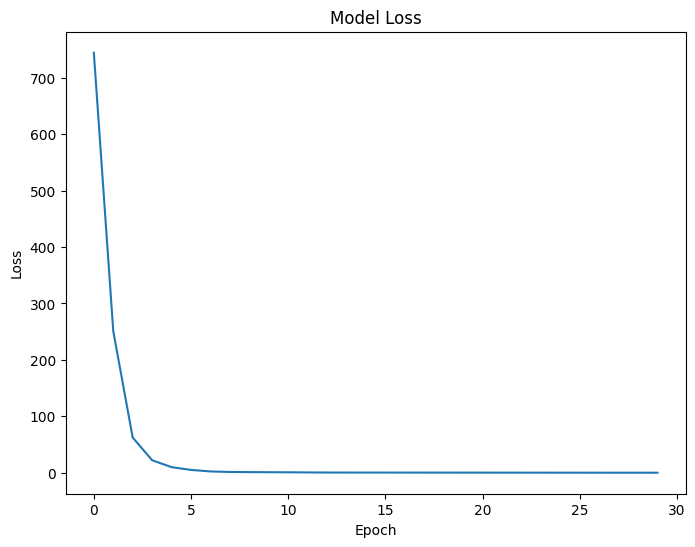

In [ ]:
# @title optimizer=adam ; learning rate=0.007 ; epochs=30 ; batch size=20 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])
opt = tf.keras.optimizers.Adam(learning_rate=0.007)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=30, batch_size=20)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/30
400/400 [==============================] - 2s 3ms/step - loss: 669.7084
Epoch 2/30
400/400 [==============================] - 1s 2ms/step - loss: 286.1250
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 124.5083
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 54.4855
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 24.5522
Epoch 6/30
400/400 [==============================] - 1s 2ms/step - loss: 11.7086
Epoch 7/30
400/400 [==============================] - 1s 2ms/step - loss: 6.0950
Epoch 8/30
400/400 [==============================] - 1s 2ms/step - loss: 3.5370
Epoch 9/30
400/400 [==============================] - 1s 2ms/step - loss: 2.4347
Epoch 10/30
400/400 [==============================] - 1s 2ms/step - loss: 1.8102
Epoch 11/30
400/400 [==============================] - 1s 2ms/step - loss: 1.5414
Epoch 12/30
400/400 [==============================] - 1s 2ms/step - loss: 1.3679
Epoch 13/30
400/

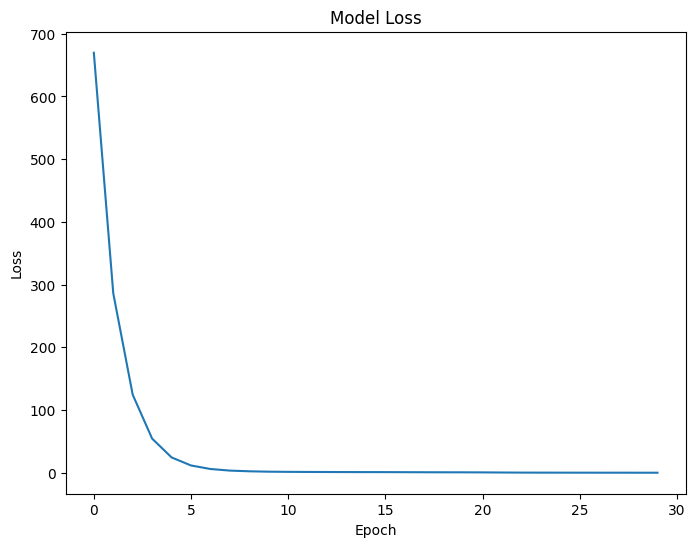

In [ ]:
# @title optimizer=adam ; learning rate=0.007 ; epochs=30 ; batch size=20 ; nodi=3,3 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(3, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])
opt = tf.keras.optimizers.Adam(learning_rate=0.007)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=30, batch_size=20)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/30
400/400 [==============================] - 2s 3ms/step - loss: 749.8895
Epoch 2/30
400/400 [==============================] - 1s 3ms/step - loss: 411.8540
Epoch 3/30
400/400 [==============================] - 1s 3ms/step - loss: 231.6559
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 125.6307
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 67.9939
Epoch 6/30
400/400 [==============================] - 1s 2ms/step - loss: 37.6817
Epoch 7/30
400/400 [==============================] - 1s 2ms/step - loss: 21.0152
Epoch 8/30
400/400 [==============================] - 1s 2ms/step - loss: 12.3369
Epoch 9/30
400/400 [==============================] - 1s 2ms/step - loss: 8.0113
Epoch 10/30
400/400 [==============================] - 1s 2ms/step - loss: 5.7872
Epoch 11/30
400/400 [==============================] - 1s 2ms/step - loss: 4.6433
Epoch 12/30
400/400 [==============================] - 1s 2ms/step - loss: 3.9645
Epoch 13/30
4

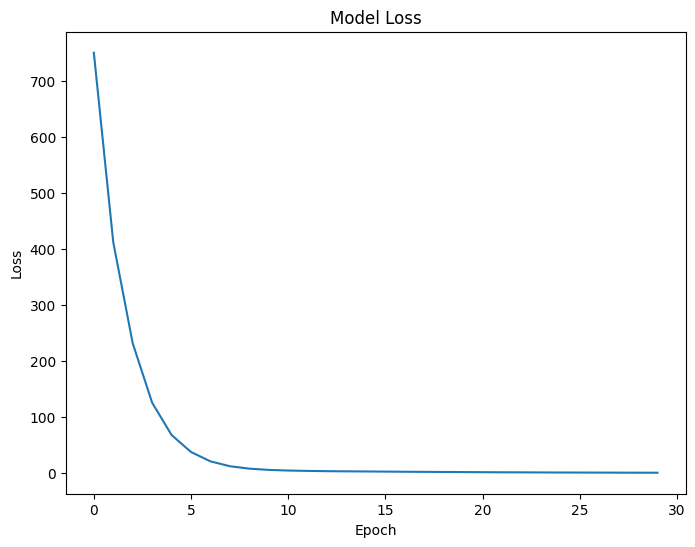

In [ ]:
# @title optimizer=adam ; learning rate=0.007 ; epochs=30 ; batch size=20 ; nodi=2,2 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])
opt = tf.keras.optimizers.Adam(learning_rate=0.007)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=30, batch_size=20)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/30
400/400 [==============================] - 1s 2ms/step - loss: 802.1016
Epoch 2/30
400/400 [==============================] - 1s 2ms/step - loss: 649.2569
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 543.8193
Epoch 4/30
400/400 [==============================] - 2s 4ms/step - loss: 456.5318
Epoch 5/30
400/400 [==============================] - 1s 3ms/step - loss: 382.4864
Epoch 6/30
400/400 [==============================] - 1s 3ms/step - loss: 318.0394
Epoch 7/30
400/400 [==============================] - 1s 3ms/step - loss: 262.7953
Epoch 8/30
400/400 [==============================] - 1s 2ms/step - loss: 215.8582
Epoch 9/30
400/400 [==============================] - 1s 2ms/step - loss: 176.0226
Epoch 10/30
400/400 [==============================] - 1s 2ms/step - loss: 142.4222
Epoch 11/30
400/400 [==============================] - 1s 2ms/step - loss: 114.2580
Epoch 12/30
400/400 [==============================] - 1s 2ms/step - loss: 90.8347
Ep

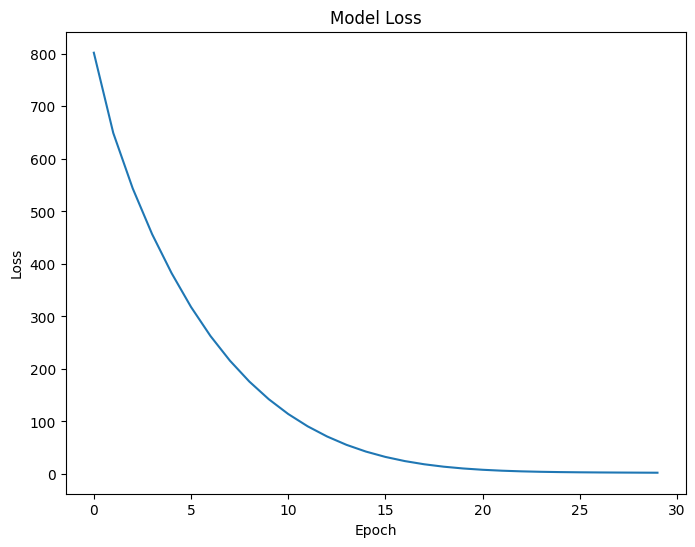

In [ ]:
# @title optimizer=adam ; learning rate=0.002 ; epochs=30 ; batch size=20 ; nodi=2,2 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])
opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=30, batch_size=20)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/30
400/400 [==============================] - 1s 2ms/step - loss: 970.3680
Epoch 2/30
400/400 [==============================] - 1s 2ms/step - loss: 904.2889
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 848.3800
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 734.4175
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 579.6667
Epoch 6/30
400/400 [==============================] - 1s 2ms/step - loss: 452.2946
Epoch 7/30
400/400 [==============================] - 1s 2ms/step - loss: 368.7010
Epoch 8/30
400/400 [==============================] - 1s 2ms/step - loss: 301.7899
Epoch 9/30
400/400 [==============================] - 1s 3ms/step - loss: 246.9226
Epoch 10/30
400/400 [==============================] - 1s 3ms/step - loss: 201.3986
Epoch 11/30
400/400 [==============================] - 1s 3ms/step - loss: 163.3293
Epoch 12/30
400/400 [==============================] - 1s 3ms/step - loss: 131.4120
E

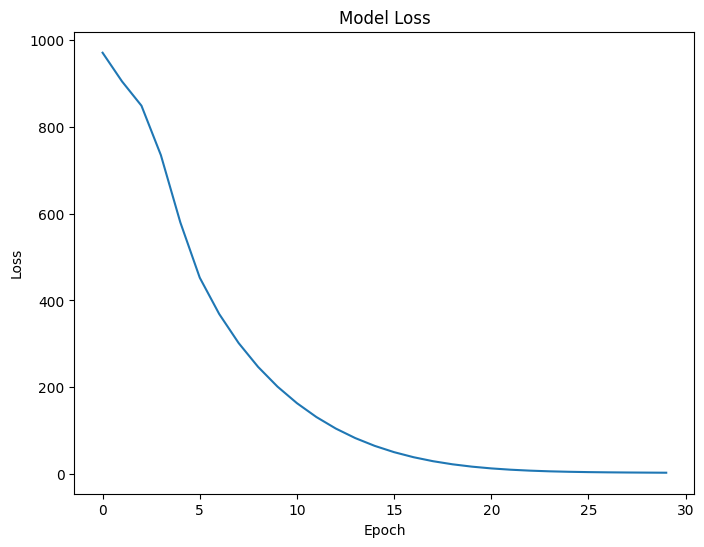

In [ ]:
# @title optimizer=adam ; learning rate=0.002 ; epochs=30 ; batch size=20 ; nodi=3,2 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])
opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=30, batch_size=20)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/35
400/400 [==============================] - 1s 2ms/step - loss: 894.7993
Epoch 2/35
400/400 [==============================] - 1s 2ms/step - loss: 785.3688
Epoch 3/35
400/400 [==============================] - 1s 2ms/step - loss: 702.4721
Epoch 4/35
400/400 [==============================] - 1s 2ms/step - loss: 630.9321
Epoch 5/35
400/400 [==============================] - 1s 2ms/step - loss: 566.0721
Epoch 6/35
400/400 [==============================] - 1s 2ms/step - loss: 507.0318
Epoch 7/35
400/400 [==============================] - 1s 2ms/step - loss: 453.2560
Epoch 8/35
400/400 [==============================] - 1s 2ms/step - loss: 404.3973
Epoch 9/35
400/400 [==============================] - 1s 2ms/step - loss: 360.2107
Epoch 10/35
400/400 [==============================] - 1s 2ms/step - loss: 319.9763
Epoch 11/35
400/400 [==============================] - 1s 2ms/step - loss: 282.5314
Epoch 12/35
400/400 [==============================] - 1s 2ms/step - loss: 247.1367
E

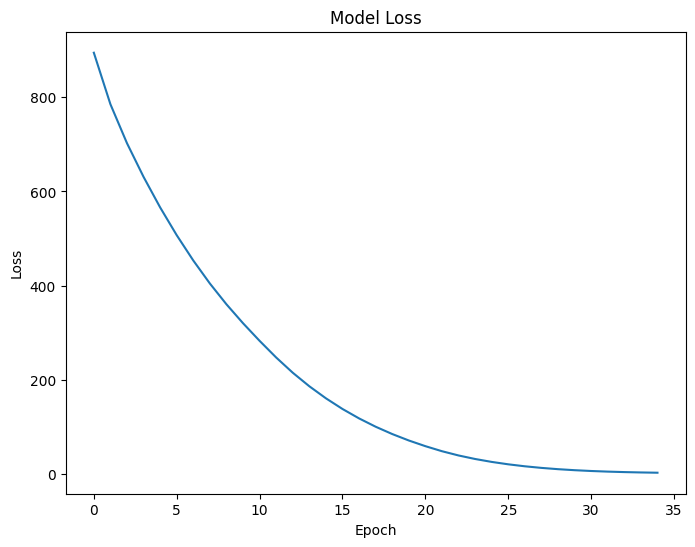

In [ ]:
# @title optimizer=adam ; learning rate=0.002 ; epochs=35 ; batch size=20 ; nodi=3,2 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])
opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=35, batch_size=20)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 124.3293
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 110.6083
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 111.0537
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 111.2759
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 111.0503
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 110.4650
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 110.6533
Epoch 8/10
400/400 [==============================] - 1s 2ms/step - loss: 110.9640
Epoch 9/10
400/400 [==============================] - 1s 2ms/step - loss: 111.4591
Epoch 10/10
400/400 [==============================] - 1s 2ms/step - loss: 111.0664


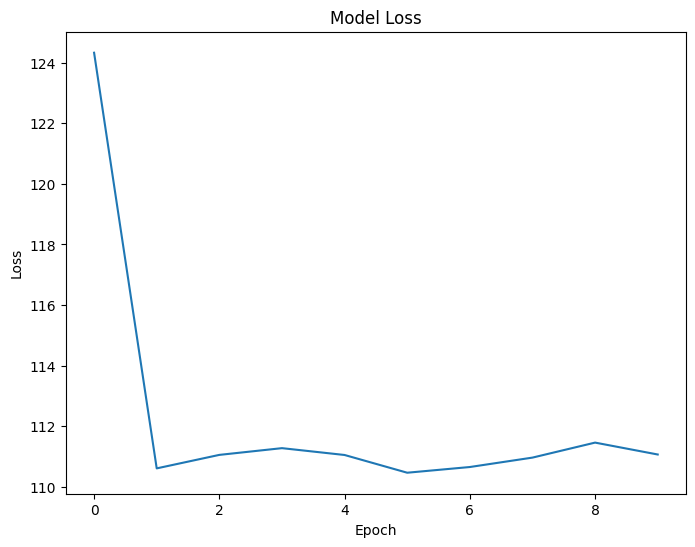

In [ ]:
# @title optimizer=adam ; learning rate=0.8 ; epochs=10 ; batch size=20 ; nodi=3,2 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])
opt = tf.keras.optimizers.Adam(learning_rate=0.8)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=10, batch_size=20)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/50
100/100 [==============================] - 1s 2ms/step - loss: 287.8260
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 30.5517
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 4.5965
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 2.7983
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 1.5227
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 1.1910
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5443
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 0.8713
Epoch 9/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4423
Epoch 10/50
100/100 [==============================] - 0s 2ms/step - loss: 0.6778
Epoch 11/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4758
Epoch 12/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3033
Epoch 13/50
100/100 [=

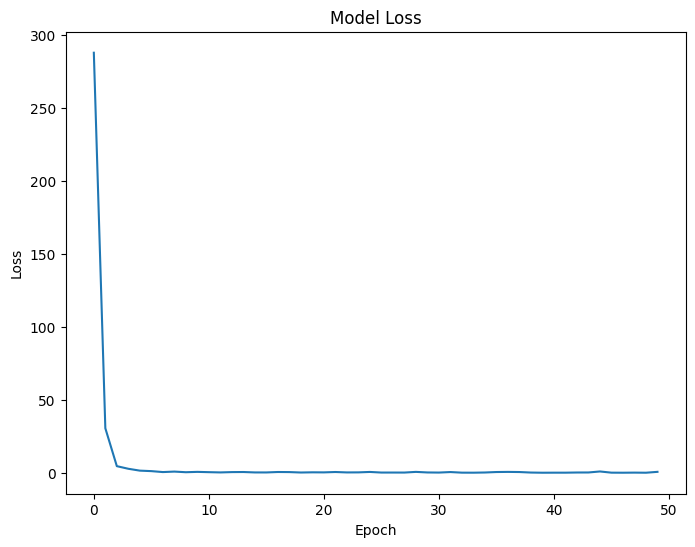

In [ ]:
# @title optimizer=adam ; learning rate=8 ; epochs=20 ; batch size=80 ; nodi=8,8 ; layer=2 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer= opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=50, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/200
100/100 [==============================] - 1s 2ms/step - loss: 172.8672
Epoch 2/200
100/100 [==============================] - 0s 2ms/step - loss: 109.4299
Epoch 3/200
100/100 [==============================] - 0s 2ms/step - loss: 110.9068
Epoch 4/200
100/100 [==============================] - 0s 2ms/step - loss: 110.1612
Epoch 5/200
100/100 [==============================] - 0s 2ms/step - loss: 110.0330
Epoch 6/200
100/100 [==============================] - 0s 2ms/step - loss: 109.7222
Epoch 7/200
100/100 [==============================] - 0s 2ms/step - loss: 109.6477
Epoch 8/200
100/100 [==============================] - 0s 3ms/step - loss: 109.6749
Epoch 9/200
100/100 [==============================] - 0s 2ms/step - loss: 109.5774
Epoch 10/200
100/100 [==============================] - 0s 2ms/step - loss: 109.5704
Epoch 11/200
100/100 [==============================] - 0s 2ms/step - loss: 109.4031
Epoch 12/200
100/100 [==============================] - 0s 2ms/step - loss

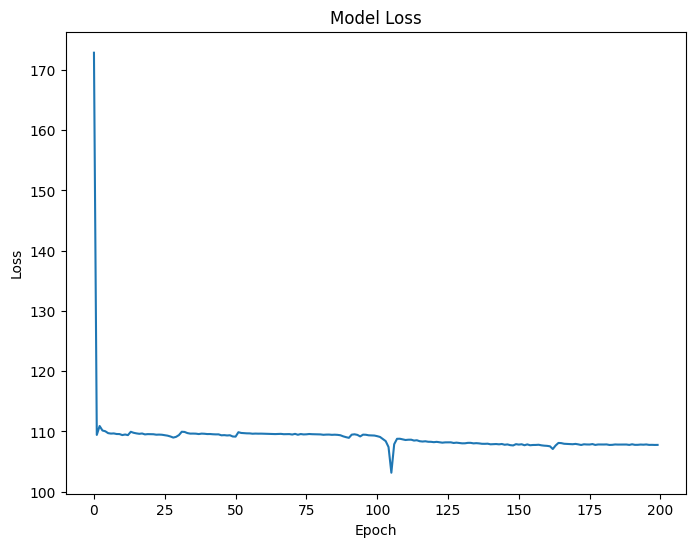

63/63 [==============================] - 0s 2ms/step
[[29.581944]
 [29.581944]
 [29.581944]
 ...
 [29.581944]
 [29.581944]
 [29.581944]]
Confronto tra i valori di velocità predetti e teorici 
         altezza  velocità predetta  velocità teorica
0     72.026792          29.581944         37.572931
1     68.728300          29.581944         36.702516
2      9.575420          29.581944         13.699570
3     92.257240          29.581944         42.523428
4     56.847220          29.581944         33.379717
...         ...                ...               ...
1995  85.765599          29.581944         41.000070
1996  89.750884          29.581944         41.941833
1997  94.670792          29.581944         43.076067
1998  39.748799          29.581944         27.911941
1999  21.714040          29.581944         20.629959

[2000 rows x 3 columns]


 Theoretical velocity for h=30.0: 37.57293082708475 m/s
Predicted velocity for h=30.0: 29.58194351196289 m/s


In [ ]:
# @title optimizer=SGD ; learning rate=0.01 ; epochs=200 ;batch size=80 ; layer=2; nodi=4,4 ; attivazione=sigmoid

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

model.compile(optimizer='SGD', loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=200, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Test the model with a new height value

predicted_velocity = model.predict(h_values_te)
print(predicted_velocity)
theoretical_velocity = np.sqrt(2 * g * h_values_te)

fall_df_test = pd.DataFrame(data = h_values_te, columns = ['altezza'])
fall_df_test['velocità predetta'] = predicted_velocity
fall_df_test['velocità teorica'] = theoretical_velocity
print('Confronto tra i valori di velocità predetti e teorici \n', fall_df_test)


new_height = np.array([[30.0]])
print(f"\n\n Theoretical velocity for h={new_height[0, 0]}: {theoretical_velocity[0, 0]} m/s")
print(f"Predicted velocity for h={new_height[0, 0]}: {predicted_velocity[0, 0]} m/s")

Epoch 1/200
100/100 [==============================] - 1s 2ms/step - loss: 153.7834
Epoch 2/200
100/100 [==============================] - 0s 2ms/step - loss: 111.2322
Epoch 3/200
100/100 [==============================] - 0s 3ms/step - loss: 110.6879
Epoch 4/200
100/100 [==============================] - 0s 3ms/step - loss: 110.1600
Epoch 5/200
100/100 [==============================] - 0s 3ms/step - loss: 109.8579
Epoch 6/200
100/100 [==============================] - 0s 3ms/step - loss: 109.7777
Epoch 7/200
100/100 [==============================] - 0s 3ms/step - loss: 109.5570
Epoch 8/200
100/100 [==============================] - 0s 2ms/step - loss: 109.6840
Epoch 9/200
100/100 [==============================] - 0s 3ms/step - loss: 109.5922
Epoch 10/200
100/100 [==============================] - 0s 3ms/step - loss: 109.5040
Epoch 11/200
100/100 [==============================] - 0s 3ms/step - loss: 109.3491
Epoch 12/200
100/100 [==============================] - 0s 3ms/step - loss

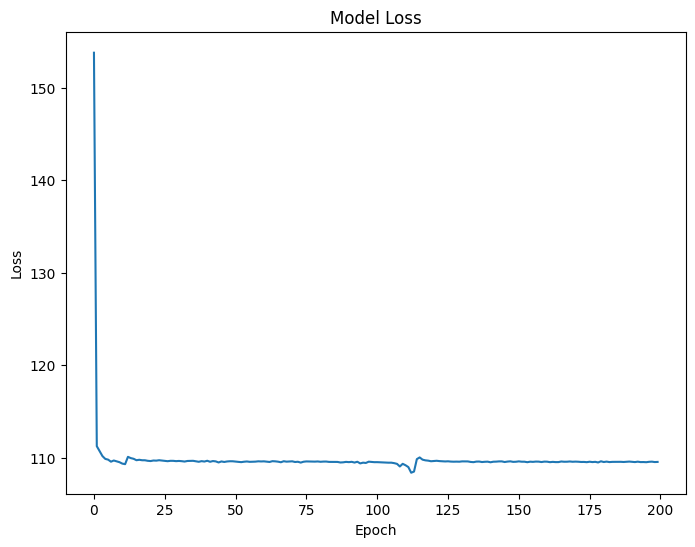

63/63 [==============================] - 0s 2ms/step
[[29.46894]
 [29.46894]
 [29.46894]
 ...
 [29.46894]
 [29.46894]
 [29.46894]]
Confronto tra i valori di velocità predetti e teorici 
         altezza  velocità predetta  velocità teorica
0     72.026792          29.468941         37.572931
1     68.728300          29.468941         36.702516
2      9.575420          29.468941         13.699570
3     92.257240          29.468941         42.523428
4     56.847220          29.468941         33.379717
...         ...                ...               ...
1995  85.765599          29.468941         41.000070
1996  89.750884          29.468941         41.941833
1997  94.670792          29.468941         43.076067
1998  39.748799          29.468941         27.911941
1999  21.714040          29.468941         20.629959

[2000 rows x 3 columns]


 Theoretical velocity for h=30.0: 37.57293082708475 m/s
Predicted velocity for h=30.0: 29.46894073486328 m/s


In [ ]:
# @title optimizer=SGD ; learning rate=0.01 ; epochs=200 ; batch size=80 ; layer=2 ; nodi=4,4  ; attivazione=sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

model.compile(optimizer='SGD', loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=200, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Test the model with a new height value

predicted_velocity = model.predict(h_values_te)
print(predicted_velocity)
theoretical_velocity = np.sqrt(2 * g * h_values_te)

fall_df_test = pd.DataFrame(data = h_values_te, columns = ['altezza'])
fall_df_test['velocità predetta'] = predicted_velocity
fall_df_test['velocità teorica'] = theoretical_velocity
print('Confronto tra i valori di velocità predetti e teorici \n', fall_df_test)

new_height = np.array([[30.0]])
print(f"\n\n Theoretical velocity for h={new_height[0, 0]}: {theoretical_velocity[0, 0]} m/s")
print(f"Predicted velocity for h={new_height[0, 0]}: {predicted_velocity[0, 0]} m/s")

Epoch 1/200
100/100 [==============================] - 1s 3ms/step - loss: 944.4049
Epoch 2/200
100/100 [==============================] - 0s 3ms/step - loss: 944.3707
Epoch 3/200
100/100 [==============================] - 0s 3ms/step - loss: 944.3337
Epoch 4/200
100/100 [==============================] - 0s 3ms/step - loss: 944.2938
Epoch 5/200
100/100 [==============================] - 0s 3ms/step - loss: 944.2512
Epoch 6/200
100/100 [==============================] - 0s 3ms/step - loss: 944.2060
Epoch 7/200
100/100 [==============================] - 0s 3ms/step - loss: 944.1588
Epoch 8/200
100/100 [==============================] - 0s 2ms/step - loss: 944.1097
Epoch 9/200
100/100 [==============================] - 0s 2ms/step - loss: 944.0580
Epoch 10/200
100/100 [==============================] - 0s 2ms/step - loss: 944.0051
Epoch 11/200
100/100 [==============================] - 0s 2ms/step - loss: 943.9495
Epoch 12/200
100/100 [==============================] - 0s 2ms/step - loss

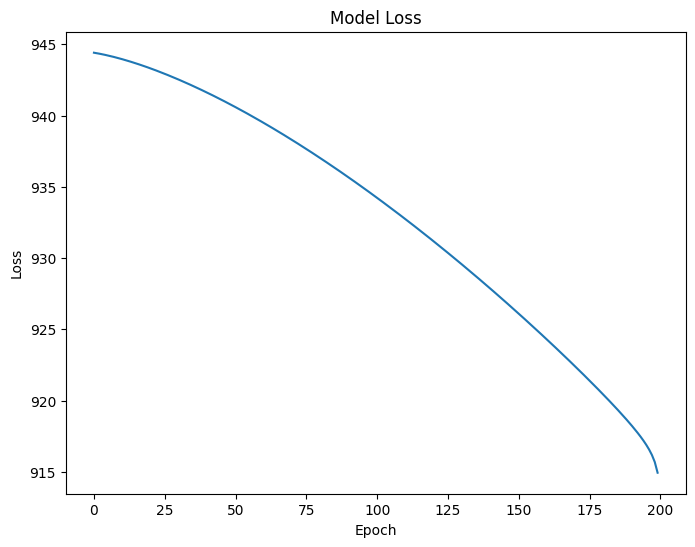

63/63 [==============================] - 0s 3ms/step
Confronto tra i valori di velocità predetti e teorici 
         altezza  velocità predetta  velocità teorica
0     72.026792           0.938733         37.572931
1     68.728300           0.941628         36.702516
2      9.575420           1.046906         13.699570
3     92.257240           0.925711         42.523428
4     56.847220           0.954296         33.379717
...         ...                ...               ...
1995  85.765599           0.929109         41.000070
1996  89.750884           0.926947         41.941833
1997  94.670792           0.924604         43.076067
1998  39.748799           0.979517         27.911941
1999  21.714040           1.015109         20.629959

[2000 rows x 3 columns]


 Theoretical velocity for h=30.0: 37.57293082708475 m/s
Predicted velocity for h=30.0: 0.938732922077179 m/s


In [ ]:
# @title optimizer=adadelta ; learning rate=0.001 ; epochs=200 ;batch size=80 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

model.compile(optimizer='adadelta', loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=200, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Test the model with a new height value

predicted_velocity = model.predict(h_values_te)
theoretical_velocity = np.sqrt(2 * g * h_values_te)

fall_df_test = pd.DataFrame(data = h_values_te, columns = ['altezza'])
fall_df_test['velocità predetta'] = predicted_velocity
fall_df_test['velocità teorica'] = theoretical_velocity
print('Confronto tra i valori di velocità predetti e teorici \n', fall_df_test)

new_height = np.array([[30.0]])
print(f"\n\n Theoretical velocity for h={new_height[0, 0]}: {theoretical_velocity[0, 0]} m/s")
print(f"Predicted velocity for h={new_height[0, 0]}: {predicted_velocity[0, 0]} m/s")

Epoch 1/200
100/100 [==============================] - 1s 3ms/step - loss: 955.0532
Epoch 2/200
100/100 [==============================] - 0s 3ms/step - loss: 955.0112
Epoch 3/200
100/100 [==============================] - 0s 3ms/step - loss: 954.9648
Epoch 4/200
100/100 [==============================] - 0s 3ms/step - loss: 954.9154
Epoch 5/200
100/100 [==============================] - 0s 3ms/step - loss: 954.8625
Epoch 6/200
100/100 [==============================] - 0s 3ms/step - loss: 954.8062
Epoch 7/200
100/100 [==============================] - 0s 2ms/step - loss: 954.7475
Epoch 8/200
100/100 [==============================] - 0s 2ms/step - loss: 954.6856
Epoch 9/200
100/100 [==============================] - 0s 2ms/step - loss: 954.6214
Epoch 10/200
100/100 [==============================] - 0s 2ms/step - loss: 954.5544
Epoch 11/200
100/100 [==============================] - 0s 2ms/step - loss: 954.4850
Epoch 12/200
100/100 [==============================] - 0s 2ms/step - loss

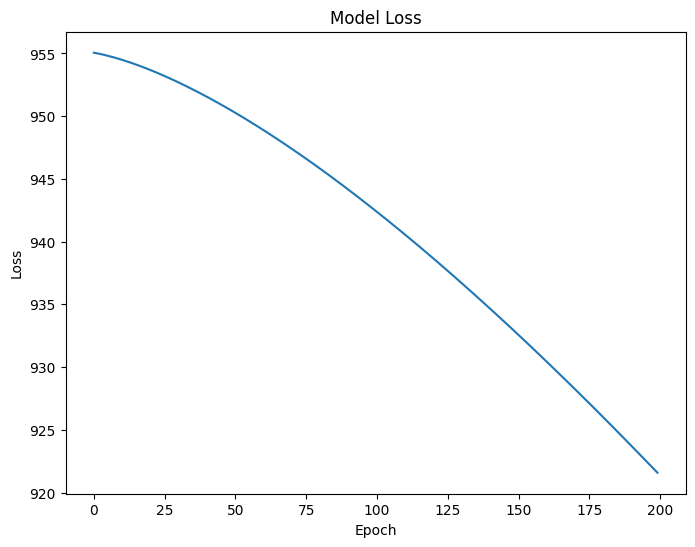

63/63 [==============================] - 0s 2ms/step
Confronto tra i valori di velocità predetti e teorici 
         altezza  velocità predetta  velocità teorica
0     72.026792           0.835709         37.572931
1     68.728300           0.835763         36.702516
2      9.575420           0.836079         13.699570
3     92.257240           0.835381         42.523428
4     56.847220           0.835949         33.379717
...         ...                ...               ...
1995  85.765599           0.835485         41.000070
1996  89.750884           0.835421         41.941833
1997  94.670792           0.835343         43.076067
1998  39.748799           0.836177         27.911941
1999  21.714040           0.836328         20.629959

[2000 rows x 3 columns]


 Theoretical velocity for h=30.0: 37.57293082708475 m/s
Predicted velocity for h=30.0: 0.8357092142105103 m/s


In [ ]:
# @title optimizer=adadelta ; learning rate=0.001 ; epochs=200 ;batch size=80 ; nodi=4,4 ; layer=2 ; attivazione= sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

model.compile(optimizer='adadelta', loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=200, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# @title
# Test the model with a new height value

predicted_velocity = model.predict(h_values_te)
theoretical_velocity = np.sqrt(2 * g * h_values_te)

fall_df_test = pd.DataFrame(data = h_values_te, columns = ['altezza'])
fall_df_test['velocità predetta'] = predicted_velocity
fall_df_test['velocità teorica'] = theoretical_velocity
print('Confronto tra i valori di velocità predetti e teorici \n', fall_df_test)

new_height = np.array([[30.0]])
print(f"\n\n Theoretical velocity for h={new_height[0, 0]}: {theoretical_velocity[0, 0]} m/s")
print(f"Predicted velocity for h={new_height[0, 0]}: {predicted_velocity[0, 0]} m/s")

OPTIMIZER: adagrad

Epoch 1/200
100/100 [==============================] - 1s 3ms/step - loss: 1042.8379
Epoch 2/200
100/100 [==============================] - 0s 3ms/step - loss: 1038.8749
Epoch 3/200
100/100 [==============================] - 0s 3ms/step - loss: 1036.2991
Epoch 4/200
100/100 [==============================] - 0s 2ms/step - loss: 1034.2183
Epoch 5/200
100/100 [==============================] - 0s 2ms/step - loss: 1032.4235
Epoch 6/200
100/100 [==============================] - 0s 2ms/step - loss: 1030.8219
Epoch 7/200
100/100 [==============================] - 0s 2ms/step - loss: 1029.3634
Epoch 8/200
100/100 [==============================] - 0s 2ms/step - loss: 1028.0138
Epoch 9/200
100/100 [==============================] - 0s 2ms/step - loss: 1026.7534
Epoch 10/200
100/100 [==============================] - 0s 2ms/step - loss: 1025.5664
Epoch 11/200
100/100 [==============================] - 0s 2ms/step - loss: 1024.4415
Epoch 12/200
100/100 [==============================] - 0s 2ms/

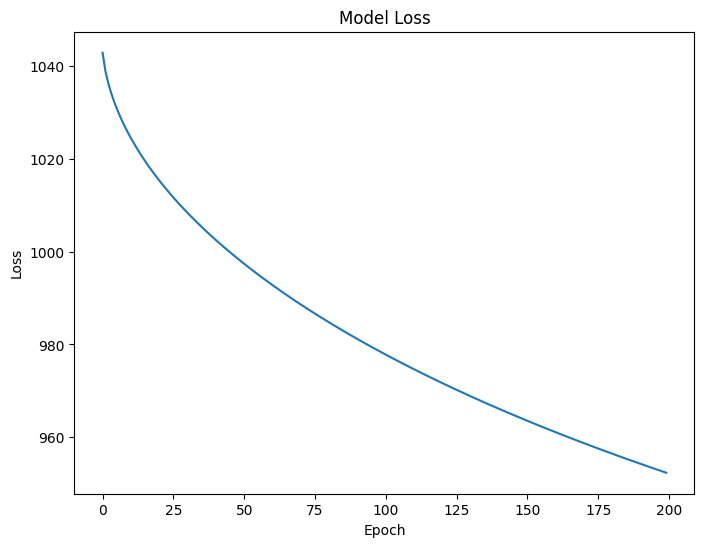

63/63 [==============================] - 0s 2ms/step
Confronto tra i valori di velocità predetti e teorici 
         altezza  velocità predetta  velocità teorica
0     72.026792           0.299813         37.572931
1     68.728300           0.299813         36.702516
2      9.575420           0.304464         13.699570
3     92.257240           0.299813         42.523428
4     56.847220           0.299813         33.379717
...         ...                ...               ...
1995  85.765599           0.299813         41.000070
1996  89.750884           0.299813         41.941833
1997  94.670792           0.299813         43.076067
1998  39.748799           0.299816         27.911941
1999  21.714040           0.300068         20.629959

[2000 rows x 3 columns]


 Theoretical velocity for h=30.0: 37.57293082708475 m/s
Predicted velocity for h=30.0: 0.29981327056884766 m/s


In [ ]:
# @title optimizer=adagrad ; learning rate=0.001 ; epochs=200 ;batch size=80 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

model.compile(optimizer='adagrad', loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=200, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# @title
# Test the model with a new height value

predicted_velocity = model.predict(h_values_te)
theoretical_velocity = np.sqrt(2 * g * h_values_te)

fall_df_test = pd.DataFrame(data = h_values_te, columns = ['altezza'])
fall_df_test['velocità predetta'] = predicted_velocity
fall_df_test['velocità teorica'] = theoretical_velocity
print('Confronto tra i valori di velocità predetti e teorici \n', fall_df_test)

new_height = np.array([[30.0]])
print(f"\n\n Theoretical velocity for h={new_height[0, 0]}: {theoretical_velocity[0, 0]} m/s")
print(f"Predicted velocity for h={new_height[0, 0]}: {predicted_velocity[0, 0]} m/s")

Epoch 1/200
100/100 [==============================] - 1s 2ms/step - loss: 1041.0199
Epoch 2/200
100/100 [==============================] - 0s 2ms/step - loss: 1035.6438
Epoch 3/200
100/100 [==============================] - 0s 2ms/step - loss: 1032.2225
Epoch 4/200
100/100 [==============================] - 0s 2ms/step - loss: 1029.4893
Epoch 5/200
100/100 [==============================] - 0s 2ms/step - loss: 1027.1514
Epoch 6/200
100/100 [==============================] - 0s 2ms/step - loss: 1025.0791
Epoch 7/200
100/100 [==============================] - 0s 2ms/step - loss: 1023.2012
Epoch 8/200
100/100 [==============================] - 0s 2ms/step - loss: 1021.4744
Epoch 9/200
100/100 [==============================] - 0s 2ms/step - loss: 1019.8683
Epoch 10/200
100/100 [==============================] - 0s 2ms/step - loss: 1018.3624
Epoch 11/200
100/100 [==============================] - 0s 2ms/step - loss: 1016.9408
Epoch 12/200
100/100 [==============================] - 0s 2ms/

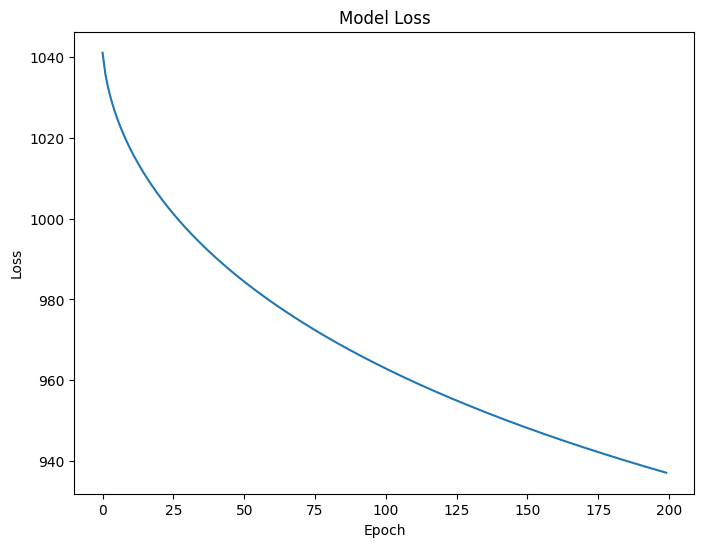

63/63 [==============================] - 0s 1ms/step
Confronto tra i valori di velocità predetti e teorici 
         altezza  velocità predetta  velocità teorica
0     72.026792           0.567871         37.572931
1     68.728300           0.567871         36.702516
2      9.575420           0.518081         13.699570
3     92.257240           0.567872         42.523428
4     56.847220           0.567861         33.379717
...         ...                ...               ...
1995  85.765599           0.567872         41.000070
1996  89.750884           0.567872         41.941833
1997  94.670792           0.567872         43.076067
1998  39.748799           0.567638         27.911941
1999  21.714040           0.562043         20.629959

[2000 rows x 3 columns]


 Theoretical velocity for h=30.0: 37.57293082708475 m/s
Predicted velocity for h=30.0: 0.5678714513778687 m/s


In [ ]:
# @title optimizer=adagrad ; learning rate=0.001 ; epochs=200 ;batch size=80 ; nodi=4,4 ; layer=2 ; attivazione=sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

model.compile(optimizer='adagrad', loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=200, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# @title
# Test the model with a new height value

predicted_velocity = model.predict(h_values_te)
theoretical_velocity = np.sqrt(2 * g * h_values_te)

fall_df_test = pd.DataFrame(data = h_values_te, columns = ['altezza'])
fall_df_test['velocità predetta'] = predicted_velocity
fall_df_test['velocità teorica'] = theoretical_velocity
print('Confronto tra i valori di velocità predetti e teorici \n', fall_df_test)

new_height = np.array([[30.0]])
print(f"\n\n Theoretical velocity for h={new_height[0, 0]}: {theoretical_velocity[0, 0]} m/s")
print(f"Predicted velocity for h={new_height[0, 0]}: {predicted_velocity[0, 0]} m/s")

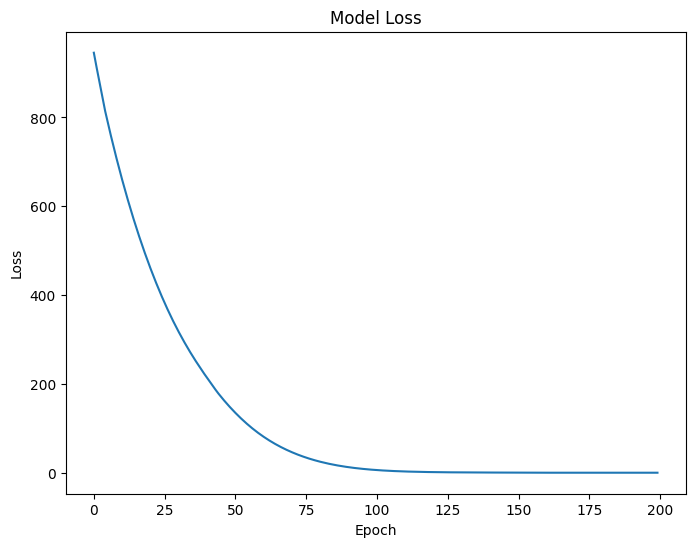

63/63 [==============================] - 0s 1ms/step
Confronto tra i valori di velocità predetti e teorici 
         altezza  velocità predetta  velocità teorica
0     72.026792          37.465881         37.572931
1     68.728300          36.592751         36.702516
2      9.575420          13.722206         13.699570
3     92.257240          42.582344         42.523428
4     56.847220          33.310532         33.379717
...         ...                ...               ...
1995  85.765599          40.976952         41.000070
1996  89.750884          41.965767         41.941833
1997  94.670792          43.155518         43.076067
1998  39.748799          27.979185         27.911941
1999  21.714040          20.492439         20.629959

[2000 rows x 3 columns]


 Theoretical velocity for h=30.0: 37.57293082708475 m/s
Predicted velocity for h=30.0: 37.46588134765625 m/s


In [ ]:
# @title optimizer=adam ; learning rate=0.01 ; epochs=200 ;batch size=80 ; nodi=4,4 ; layer=2 ; attivazione=softsign
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='softsign', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='softsign'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

# @title
model.compile(optimizer='adam', loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=200, batch_size=80, verbose = 0)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

predicted_velocity = model.predict(h_values_te)
theoretical_velocity = np.sqrt(2 * g * h_values_te)

fall_df_test = pd.DataFrame(data = h_values_te, columns = ['altezza'])
fall_df_test['velocità predetta'] = predicted_velocity
fall_df_test['velocità teorica'] = theoretical_velocity
print('Confronto tra i valori di velocità predetti e teorici \n', fall_df_test)

new_height = np.array([[30.0]])
print(f"\n\n Theoretical velocity for h={new_height[0, 0]}: {theoretical_velocity[0, 0]} m/s")
print(f"Predicted velocity for h={new_height[0, 0]}: {predicted_velocity[0, 0]} m/s")

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 276.3533
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 50.1328
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 37.1643
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 36.6417
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 36.0514
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 35.4061
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 34.7190
Epoch 8/100
100/100 [==============================] - 0s 3ms/step - loss: 33.9913
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 33.2393
Epoch 10/100
100/100 [==============================] - 0s 3ms/step - loss: 32.4626
Epoch 11/100
100/100 [==============================] - 0s 3ms/step - loss: 31.6631
Epoch 12/100
100/100 [==============================] - 0s 3ms/step - loss: 30.8494


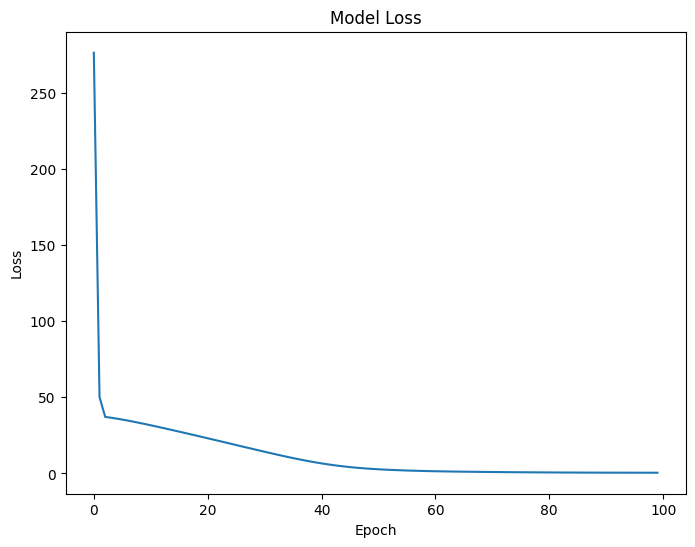

In [ ]:
# @title optimizer=adam ; learning rate=0.01 ; epochs=100 ;batch size=80 ; nodi=4,4 ; layer=2 ; attivazione=relu
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

# @title
model.compile(optimizer='adam', loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=100, batch_size=80)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/50
134/134 [==============================] - 1s 2ms/step - loss: 37.8803
Epoch 2/50
134/134 [==============================] - 0s 2ms/step - loss: 4.9128
Epoch 3/50
134/134 [==============================] - 0s 3ms/step - loss: 2.9907
Epoch 4/50
134/134 [==============================] - 0s 3ms/step - loss: 1.8729
Epoch 5/50
134/134 [==============================] - 0s 3ms/step - loss: 1.0973
Epoch 6/50
134/134 [==============================] - 0s 3ms/step - loss: 0.7291
Epoch 7/50
134/134 [==============================] - 0s 3ms/step - loss: 0.5749
Epoch 8/50
134/134 [==============================] - 0s 3ms/step - loss: 0.5548
Epoch 9/50
134/134 [==============================] - 0s 3ms/step - loss: 0.5735
Epoch 10/50
134/134 [==============================] - 0s 3ms/step - loss: 0.5709
Epoch 11/50
134/134 [==============================] - 0s 3ms/step - loss: 0.5578
Epoch 12/50
134/134 [==============================] - 0s 3ms/step - loss: 0.5601
Epoch 13/50
134/134 [===

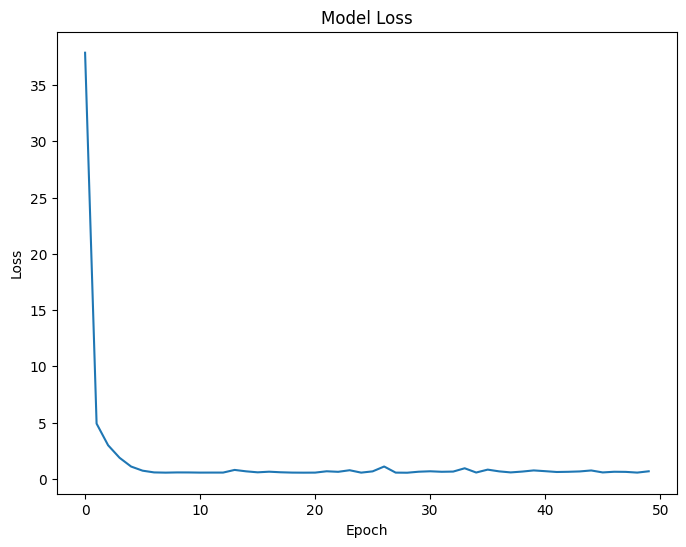

In [ ]:
# @title optimizer=adam ; learning rate=0.07 ; epochs=80 ;batch size=60 ; nodi=4,4 ; layer=2 ; attivazione=relu
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

# @title
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=50, batch_size=60)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/45
134/134 [==============================] - 1s 3ms/step - loss: 65.5340
Epoch 2/45
134/134 [==============================] - 0s 2ms/step - loss: 7.4500
Epoch 3/45
134/134 [==============================] - 0s 2ms/step - loss: 4.1362
Epoch 4/45
134/134 [==============================] - 0s 2ms/step - loss: 3.8299
Epoch 5/45
134/134 [==============================] - 0s 2ms/step - loss: 3.5565
Epoch 6/45
134/134 [==============================] - 0s 3ms/step - loss: 3.1308
Epoch 7/45
134/134 [==============================] - 0s 3ms/step - loss: 2.4778
Epoch 8/45
134/134 [==============================] - 0s 2ms/step - loss: 1.7596
Epoch 9/45
134/134 [==============================] - 0s 2ms/step - loss: 1.1441
Epoch 10/45
134/134 [==============================] - 0s 2ms/step - loss: 0.7679
Epoch 11/45
134/134 [==============================] - 0s 2ms/step - loss: 0.6111
Epoch 12/45
134/134 [==============================] - 0s 2ms/step - loss: 0.5565
Epoch 13/45
134/134 [===

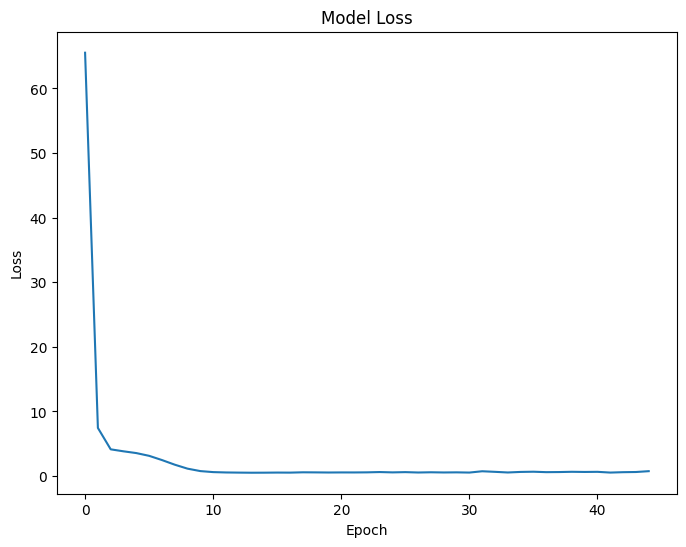

In [ ]:
# @title optimizer=adam ; learning rate=0.07 ; epochs=45 ;batch size=60 ; nodi=4,4 ; layer=2 ; attivazione=relu
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one node for velocity prediction
])

# @title
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=opt, loss='mean_squared_error')

h_values_tr = h_values_tr.reshape(-1, 1)
h_values_te = h_values_te.reshape(-1, 1)

history = model.fit(h_values_tr, v_values_tr, epochs=45, batch_size=60)

# Plot the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()